### **Import required libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("DS_Companies.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [7]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
df.drop(df[['Unnamed: 0', 'salary']], axis = 1 , inplace = True)

In [11]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L


In [13]:
df['work_year'].unique()

array([2020, 2021, 2022], dtype=int64)

## **Exploring Workforce Dynamics:**


Examining the distribution of work experience across different years, shedding light on the average salaries for each year. The analysis revealed trends in salary progression over time, offering valuable insights for career planning and salary negotiations.

In [15]:
df1 = df.groupby('work_year')['salary_in_usd'].mean().round(2)
df1

work_year
2020     95813.00
2021     99853.79
2022    124522.01
Name: salary_in_usd, dtype: float64

In [17]:
df1.index

Index([2020, 2021, 2022], dtype='int64', name='work_year')

In [19]:
df1.values

array([ 95813.  ,  99853.79, 124522.01])

In [21]:
data = {
    'work_year': df1.index,
    'average_salary': df1.values
}
df1 = pd.DataFrame(data)
df1

,work_year,average_salary
0,2020,95813.00
1,2021,99853.79
2,2022,124522.01


In [23]:
df1['average_salary'] = (df1['average_salary']/1000).round(2)
df1

,work_year,average_salary
0,2020,95.81
1,2021,99.85
2,2022,124.52


<Axes: xlabel='work_year'>

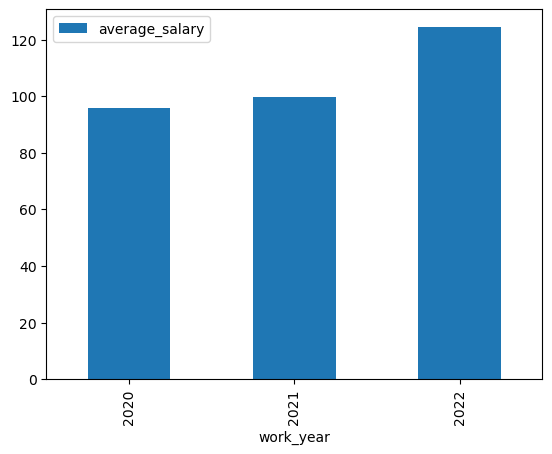

In [25]:
df1.plot(kind = 'bar', x = 'work_year', y = 'average_salary')

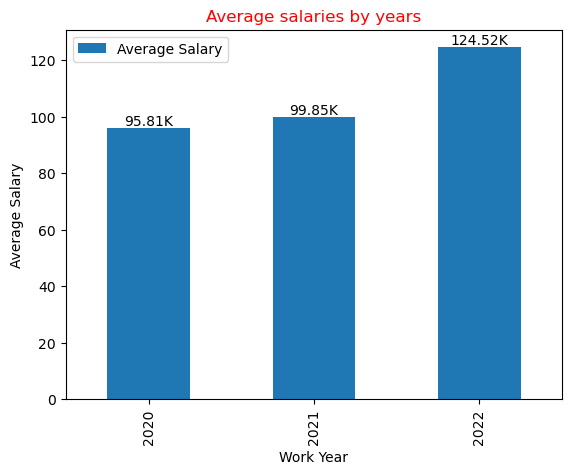

In [27]:
ax = df1.plot(kind = 'bar', x = 'work_year', y = 'average_salary', legend = True)
ax.bar_label(ax.containers[0], labels = df1['average_salary'].map('{:.2f}K'.format))
ax.legend(['Average Salary'], loc = 'upper left')
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.title('Average salaries by years', color = 'red')
plt.show()

 **The average salary has increased year by year, indicating growth in compensation trends**

In [29]:
print(ax.containers)
print(ax.containers[0])

[<BarContainer object of 3 artists>]
<BarContainer object of 3 artists>


In [31]:
for bar in ax.containers[0]:
    print(bar)


Rectangle(xy=(-0.25, 0), width=0.5, height=95.81, angle=0)
Rectangle(xy=(0.75, 0), width=0.5, height=99.85, angle=0)
Rectangle(xy=(1.75, 0), width=0.5, height=124.52, angle=0)


In [ ]:
df.head()

## **Remote Work Trends:**

Analysis delved into the prevalence of remote work positions within the dataset, categorizing employees based on their remote work status. By visualizing the distribution of remote positions, we gained insights into the evolving landscape of remote work and its impact on workforce dynamics.

In [33]:
df.remote_ratio.unique()

array([  0,  50, 100], dtype=int64)

In [35]:
df2 = df.remote_ratio.value_counts()
df2

remote_ratio
100    381
0      127
50      99
Name: count, dtype: int64

In [37]:
values = df2.to_list()
values

[381, 127, 99]

In [39]:
labels = [ 'Fully remote','No remote', 'Partially remote']
labels

['Fully remote', 'No remote', 'Partially remote']

In [ ]:
df.head(1)

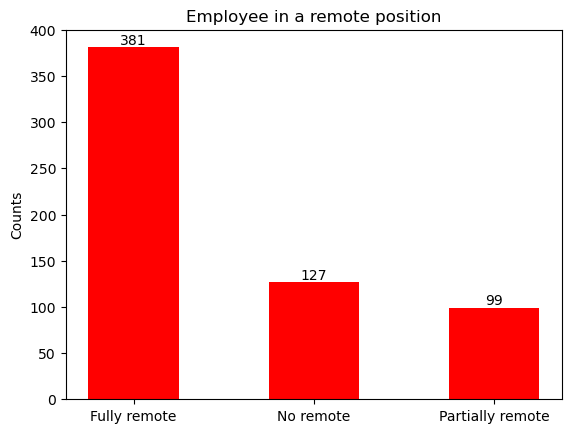

In [41]:
z = plt.bar(labels, values, width = 0.5, color = 'red')
plt.bar_label(z, labels = values)
plt.title('Employee in a remote position')
plt.ylabel('Counts')
plt.show()

**Fully remote jobs are the most common, showing a significant shift towards remote work culture**

In [43]:
df.company_size.unique()

array(['L', 'S', 'M'], dtype=object)

## **Company Size Analysis:**

Further exploration focused on the distribution of company sizes within the dataset. By visualizing the distribution of companies based on their size categories, we gained insights into the composition of companies and their workforce sizes.

In [45]:
df3 = df.company_size.value_counts()
df3

company_size
M    326
L    198
S     83
Name: count, dtype: int64

In [47]:
df3.index.to_list()

['M', 'L', 'S']

In [49]:
df3.index

Index(['M', 'L', 'S'], dtype='object', name='company_size')

In [51]:
values2 = df3.to_list()
values2

[326, 198, 83]

In [53]:
labels_for_company = ["Medium", "Large", "Small"]
labels_for_company

['Medium', 'Large', 'Small']

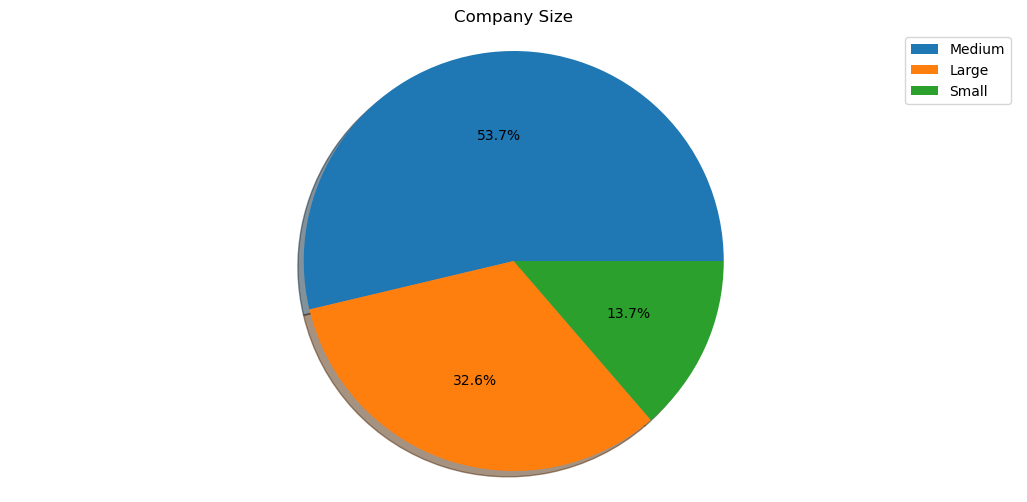

In [55]:
plt.figure(figsize = (13,6))
plt.pie(x = values2, labels = None, autopct = '%1.1f%%', shadow = True)
plt.legend(labels = labels_for_company, loc = 'upper right')
plt.axis('equal')
plt.title("Company Size")
plt.show()

**Medium-sized companies dominate hiring in the dataset**

In [ ]:
df.head(3)

## **Job Title Analysis:**

Analyzed the frequency of the top five unique job titles within the dataset, providing insights into the most common job roles. By visualizing the distribution of job titles, we gained insights into the diversity of roles and responsibilities within the workforce.

In [57]:
df.job_title.value_counts()

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                  

In [59]:
df4 = df.job_title.value_counts().head()
df4

job_title
Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: count, dtype: int64

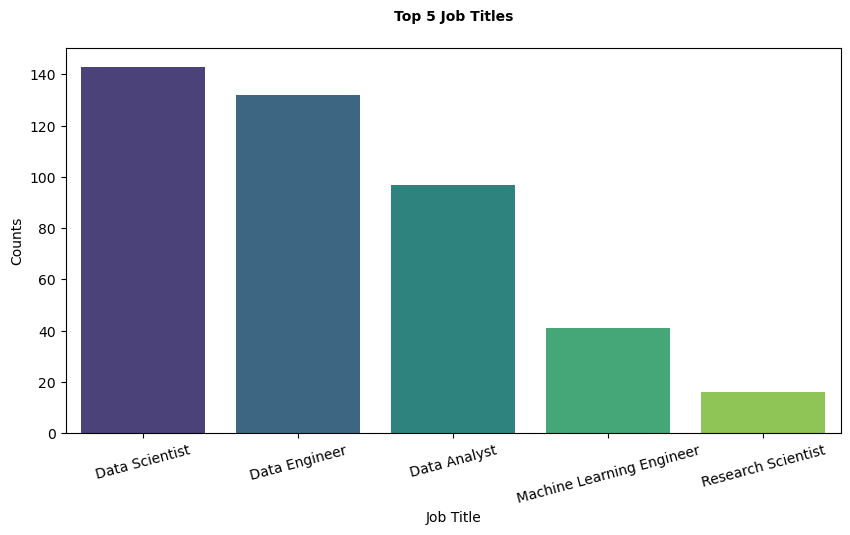

In [65]:
plt.figure(figsize = (10,5))
sns.barplot(x = df4.index, y = df4.values, palette= "viridis")
plt.title('Top 5 Job Titles', fontweight = 'bold', fontsize = 10, pad = 20)
plt.ylabel('Counts')
plt.xlabel('Job Title')
plt.xticks(rotation = 15)
plt.show()

**These results highlight that data-related roles dominate the workforce, especially in data science, engineering, and analysis, reflecting high demand in data-driven industries**

## **Salary Distribution by Company Size:**

Analysis investigated the distribution of salaries across different company sizes, providing insights into how salary scales vary based on the size of the company. By visualizing the distribution of salaries, we gained insights into salary trends and disparities across different company sizes.

In [67]:
df5 = df[["salary_in_usd", "company_size"]]
df5

,salary_in_usd,company_size
0,79833,L
1,260000,S
2,109024,M
3,20000,S
4,150000,L
...,...,...
602,154000,M
603,126000,M
604,129000,M
605,150000,M


In [69]:
df5[df5['company_size'] == 'S']

,salary_in_usd,company_size
1,260000,S
3,20000,S
6,190000,S
9,125000,S
10,51321,S
...,...,...
510,150000,S
512,65000,S
513,71444,S
515,48000,S


In [71]:
S = df5[df5['company_size'] == 'S']
M = df5[df5['company_size'] == 'M']
L = df5[df5['company_size'] == "L"]

labels = ['Small','Medium', 'Large']
sal_mean = [S['salary_in_usd'].mean(), M["salary_in_usd"].mean(), L["salary_in_usd"].mean()]
sal_mean

[77632.67469879518, 116905.46625766871, 119242.99494949495]

In [75]:
label_change = np.round([x for x in sal_mean], 1)
label_change = list(map(str, label_change))
label_change = [x + '$' for x in label_change]
label_change


['77632.7$', '116905.5$', '119243.0$']

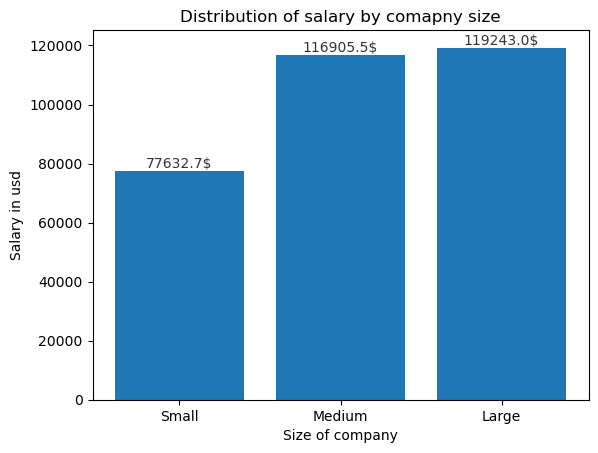

In [77]:
z = plt.bar(labels, sal_mean)
plt.bar_label(z,label_change, alpha = 0.8)
plt.title('Distribution of salary by comapny size')
plt.xlabel('Size of company')
plt.ylabel('Salary in usd')
plt.show()

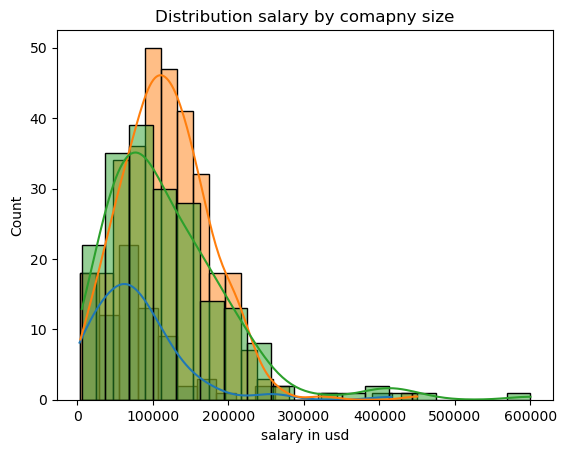

In [79]:
sns.histplot(S['salary_in_usd'], label = 'Small', kde = True)
sns.histplot(M['salary_in_usd'], label = 'Medium', kde = True)
sns.histplot(L['salary_in_usd'], label = 'Large', kde = True)
plt.title('Distribution salary by comapny size')
plt.xlabel('salary in usd')
plt.show()

**Large companies offer the highest salaries, followed by medium and then small companies**

## **Experience Level Distribution:**

Lastly, explored the distribution of experience levels within the dataset, providing insights into the composition of workforce experience across different levels. By visualizing the distribution of experience levels, we gained insights into the career progression and experience diversity within the workforce.

In [81]:
df6 = df.experience_level.value_counts()
df6

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

In [83]:
df6.index.to_list()


['SE', 'MI', 'EN', 'EX']

'SE' is mapped to 'Senior'

'MI' is mapped to 'Middle'

'EN' is mapped to 'Entry Level'

'Ex' is mapped to 'Executive'

In [85]:
exp_level = ['Senior', 'Middle', 'Entry Level', 'Ececutive']

In [87]:
values3 = df6.to_list()
values3

[280, 213, 88, 26]

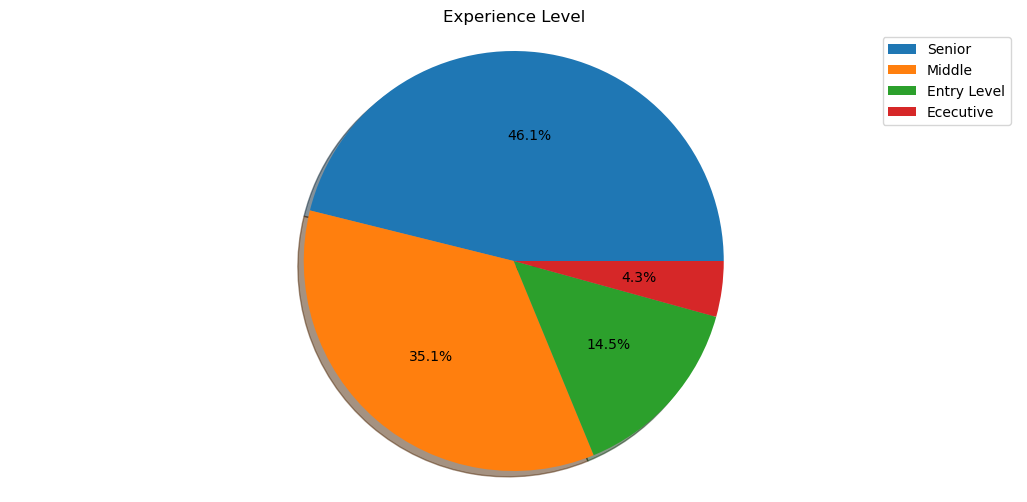

In [89]:
plt.figure(figsize = (13,6))
plt.pie(x = values3, labels = None, autopct = '%1.1f%%', shadow = True)
plt.legend(labels = exp_level, loc = 'upper right')
plt.axis('equal')
plt.title("Experience Level")
plt.show()

**Senior-level positions are the most prevalent, suggesting high demand for experienced professionals**

**The comprehensive analysis of this data science salaries dataset clearly indicates that the data science field is experiencing rapid growth, with a consistent year-over-year increase in average salaries, notably improving in 2022. There is a particularly high demand for experienced (senior-level) professionals in this domain, and core roles such as 'Data Scientist,' 'Data Engineer,' and 'Data Analyst' are the most prevalent. Furthermore, the trend of remote work is significantly increasing, with a majority of professionals working fully remotely. In terms of compensation, large and medium-sized companies offer better remuneration compared to small companies, suggesting that seeking opportunities within larger or mid-sized organizations could be beneficial for career advancement and higher salaries.**

**These insights provide crucial guidance for businesses to enhance talent acquisition and remote work policies, and for professionals to strategically navigate their career paths and salary expectations.**